In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd
import anndata
import seaborn as sns
import matplotlib.pyplot as plt

Read the data 

In [2]:
adata_genesxcells = sc.read_mtx('/lustre/groups/ml01/datasets/projects/2023_hoparl_perturbseq_alessandro.palma/unperturbed_time_course_processed/processed/matrix.mtx')

Transpose to have cell x genes

In [3]:
adata = anndata.AnnData(adata_genesxcells.X.T)

In [4]:
adata.X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 7.],
        [0., 0., 0., ..., 0., 0., 3.]], dtype=float32)

The matrix is unnormalized

**Get the information on cells, barcodes and genes**

In [5]:
barcode_path = '/lustre/groups/ml01/datasets/projects/2023_hoparl_perturbseq_alessandro.palma/unperturbed_time_course_processed/processed/barcodes.tsv'
cellidentity_path = '/lustre/groups/ml01/datasets/projects/2023_hoparl_perturbseq_alessandro.palma/unperturbed_time_course_processed/processed/cell_identities.csv'
genes_path = '/lustre/groups/ml01/datasets/projects/2023_hoparl_perturbseq_alessandro.palma/unperturbed_time_course_processed/processed/genes.tsv'

In [6]:
barcodes = pd.read_csv(barcode_path, sep='\t', header=None)
cellidentity = pd.read_csv(cellidentity_path)
genes = pd.read_csv(genes_path, sep='\t', header=None)

In [7]:
cellidentity


,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,CGATTGACAGCGAACA-2,GFP_pBA571-59,29624,396,74.808081,2,True,1
1,AAACGGGTCGTCACGG-2,GFP_pBA571-59,27369,368,74.372283,2,True,1
2,GCGCAACCACATTCGA-2,GFP_pBA571-59,26865,342,78.552632,2,True,1
3,GCTGCGAAGAGGTACC-2,GFP_pBA571-58,26823,423,63.411348,2,True,1
4,TACTCATGTCAGAATA-2,GFP_pBA571-59,25175,349,72.134670,2,True,1
...,...,...,...,...,...,...,...,...
14502,GCCTCTAGTTCCCGAG-1,*,1,1,1.000000,1,False,0
14503,GGAAAGCTCGTGGACC-2,*,1,1,1.000000,2,False,0
14504,GGGACCTGTAGCTTGT-1,*,1,1,1.000000,1,False,0
14505,GGTGTTAGTCTACCTC-1,*,1,1,1.000000,1,False,0


In [8]:
genes.columns = ['ENSMBL', 'gene ID']

In [9]:
barcodes

,0
0,AAACCTGAGCGTAGTG-1
1,AAACCTGAGGCTAGAC-1
2,AAACCTGCACGGTAGA-1
3,AAACCTGCAGGTCCAC-1
4,AAACCTGGTGGCCCTA-1
...,...
14509,TTTGTCATCATTGCGA-2
14510,TTTGTCATCCCAAGTA-2
14511,TTTGTCATCCCACTTG-2
14512,TTTGTCATCGTCACGG-2


**Read metadata**

In [10]:
metadata = pd.read_excel('/lustre/groups/ml01/datasets/projects/2023_hoparl_perturbseq_alessandro.palma/unperturbed_time_course_processed/unperturbed_time_course_processed.xlsx')

In [11]:
metadata

,cell_barcode,gem_group,UMI_count,guide_UMI_count,guide_read_count,guide_coverage,MOI,experimental_time,cell_cycle_phase,viral_load,interferon_score,cluster,UMAP_1,UMAP_2
0,AAACCTGAGCGTAGTG-1,1,13247,29,1573,54.24,low,028h,M-G1,0.008908,1.815345,bystander,-3.302532,-0.172898
1,AAACCTGAGGCTAGAC-1,1,14094,12,487,40.58,low,096h,G2-M,0.671137,-1.316287,infected_6,-1.101087,11.574987
2,AAACCTGCACGGTAGA-1,1,16487,73,3266,44.74,low,028h,S,0.012373,1.377850,bystander,-1.994823,0.308592
3,AAACCTGCAGGTCCAC-1,1,12119,61,3859,63.26,low,048h,G1-S,0.011965,0.612030,bystander,-1.700732,1.202923
4,AAACCTGGTGGCCCTA-1,1,23214,56,2714,48.46,low,072h,G2-M,0.007625,0.733405,bystander,-1.540104,1.291726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12914,TTTGTCATCATTGCGA-2,2,17438,34,1848,54.35,high,072h,M-G1,0.124326,-0.022159,infected_2,4.589217,-0.501372
12915,TTTGTCATCCCAAGTA-2,2,20186,69,5235,75.87,high,048h,S,0.035123,-1.130894,infected_2,6.416167,-3.043289
12916,TTTGTCATCCCACTTG-2,2,30703,66,4618,69.97,high,048h,G1-S,0.036153,-0.488409,infected_2,6.270998,-3.114618
12917,TTTGTCATCGTCACGG-2,2,58488,47,2754,58.60,high,048h,S,0.445698,-1.110313,infected_5,1.711608,10.221025


In [12]:
cells_to_keep = barcodes.loc[barcodes.isin(np.array(metadata.cell_barcode))[0]]
# Get indexes
cells_to_keep_idx = np.array(cells_to_keep.index)

Keep only the cells that appear both in the metadata and cellidentity matrix

In [13]:
adata = adata[cells_to_keep_idx,:]

Fix the observations

In [14]:
adata.obs = metadata

Fix the vars

In [15]:
adata.var = pd.DataFrame(genes)
adata.var.index = adata.var['gene ID']

In [16]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 

**Pre-processing**

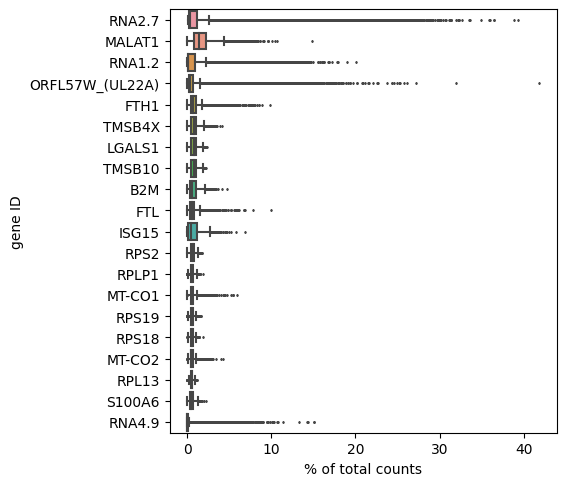

In [17]:
sc.pl.highest_expr_genes(adata, n_top=20)

Highlight genes with more than 10000 transcripts

In [18]:
len(np.where(adata.X.todense().sum(0)>10000)[0])

3588

In [19]:
highly_expressed_genes = np.array((adata.X.todense().sum(0)>10000).astype(np.bool)).squeeze(0)

In [20]:
adata.var['highly_expressed_genes'] = highly_expressed_genes

In [21]:
adata.var['highly_variable'] = highly_expressed_genes

Normalize like they say

In [22]:
sc.pp.normalize_total(adata, np.mean(adata.X.sum(1)))

Detect genes with more than 10000m UMIs

In [23]:
# PCA
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

**UMAP**

In [24]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

... storing 'MOI' as categorical
... storing 'experimental_time' as categorical
... storing 'cell_cycle_phase' as categorical
... storing 'cluster' as categorical
... storing 'gene ID' as categorical


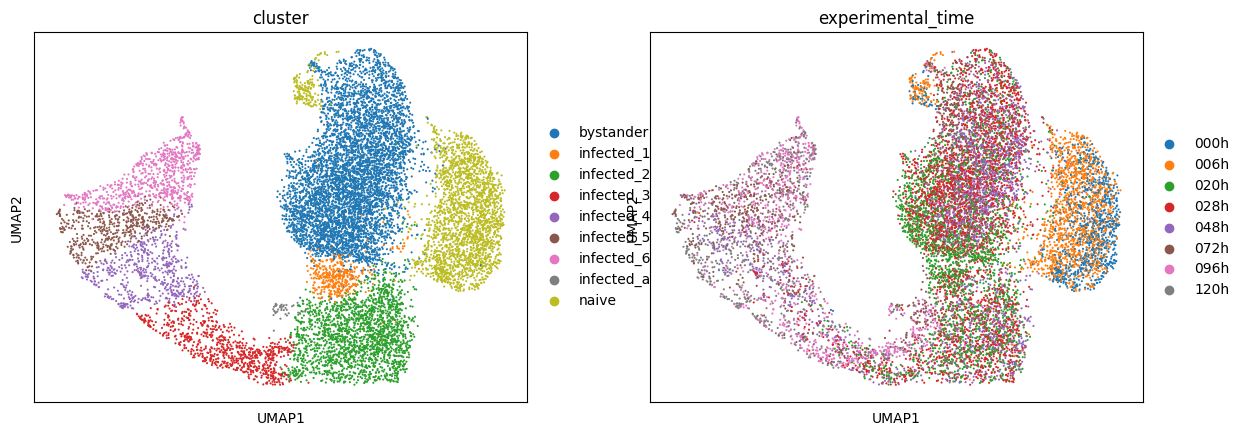

In [25]:
sc.pl.umap(adata, color=['cluster', 'experimental_time'])

In [55]:
adata.obsm['X_umap'] = np.vstack([metadata.UMAP_1, metadata.UMAP_2]).T

... storing 'MOI' as categorical
... storing 'experimental_time' as categorical
... storing 'cell_cycle_phase' as categorical
... storing 'cluster' as categorical
... storing 'gene ID' as categorical


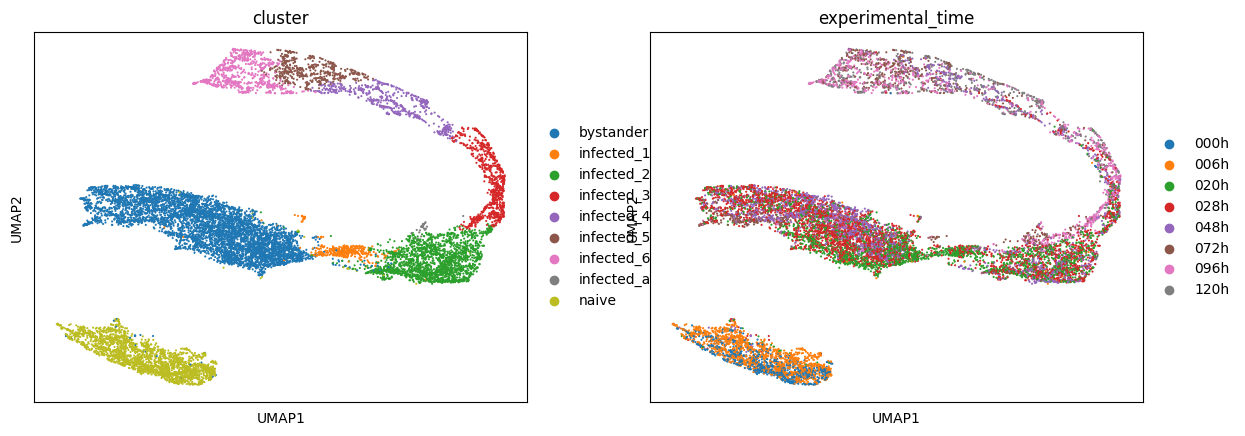

In [56]:
sc.pl.umap(adata, color=['cluster', 'experimental_time'])